In [2]:
from sklearn.cluster import KMeans

In [3]:
import pandas as pd

In [5]:
house_data = pd.read_csv('house_rental_data.csv.txt', index_col='Unnamed: 0')

In [7]:
kmeans = KMeans(n_clusters=3)

In [8]:
kmeans.fit(house_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
import numpy as np
idx = np.where(kmeans.labels_ == 1)

In [15]:
house_data.iloc[idx]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
2,2134.800,5,7,4,2,2,78000
10,1423.200,4,5,4,2,2,65000
16,2768.124,6,19,3,2,2,100000
19,2739.660,6,19,3,2,2,90000
22,2768.124,6,19,3,2,2,100000
24,1668.702,4,12,3,2,2,105000
26,1779.000,10,12,4,2,2,98000
31,1732.746,8,12,4,2,2,65000
32,1245.300,10,12,3,0,0,85000
44,1352.040,1,4,4,2,2,65000


#### Optimum Number of Clusters

In [17]:
cost_house = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(house_data)
    cost_house.append(-1*kmeans.score(house_data))

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

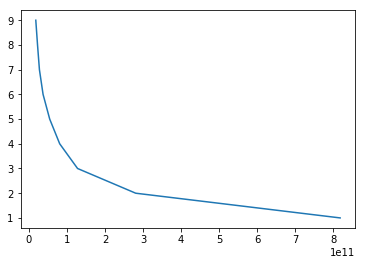

In [20]:
plt.plot(cost_house,range(1,10))

In [21]:
kmeans  = KMeans(n_clusters=4)

In [27]:
from sklearn.preprocessing import StandardScaler

In [31]:
ss = StandardScaler()
house_data_ss = ss.fit_transform(house_data)
kmeans.fit(house_data_ss)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [32]:
l = kmeans.labels_

In [36]:
house_data.iloc[np.where(l == 0)]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
3,1138.560,5,7,2,2,1,58000
8,757.854,5,14,1,0,1,48000
11,668.904,4,11,1,1,1,31000
12,711.600,4,7,2,1,1,29002
14,818.340,4,13,2,2,1,48000
17,711.600,5,13,2,2,1,48000
18,462.540,5,13,1,1,1,25000
23,747.180,7,15,2,2,1,55000
29,533.700,3,4,1,1,1,25000
30,853.920,6,7,2,1,1,24028


In [37]:
from sklearn.datasets import load_digits

In [38]:
digits = load_digits()

In [41]:
cost = []
for i in range(5,25):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(digits.data)
    cost.append(-1 * kmeans.score(digits.data))

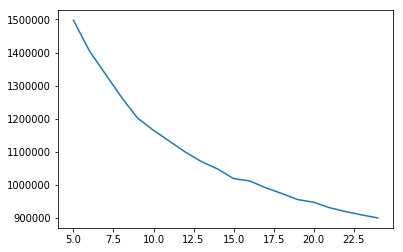

In [45]:
plt.plot(range(5,25),cost)